# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')


# Load and process the dataset

In [2]:
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

In [3]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [4]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [5]:
df.shape

(364, 70)

In [6]:
df.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


# EDA

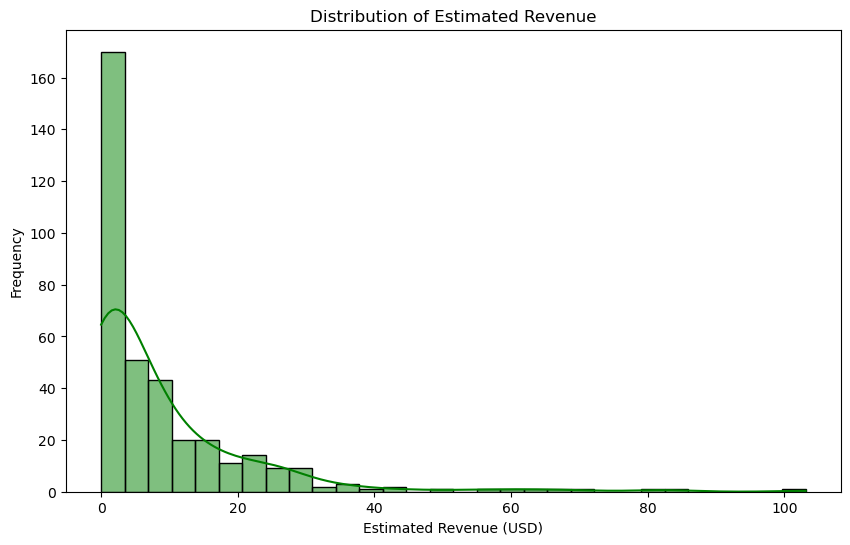

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True, color='green')
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()


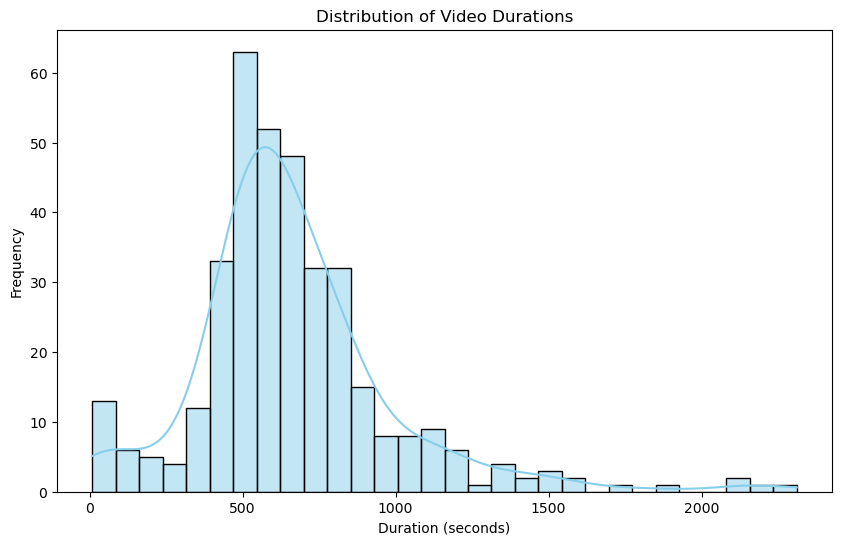

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


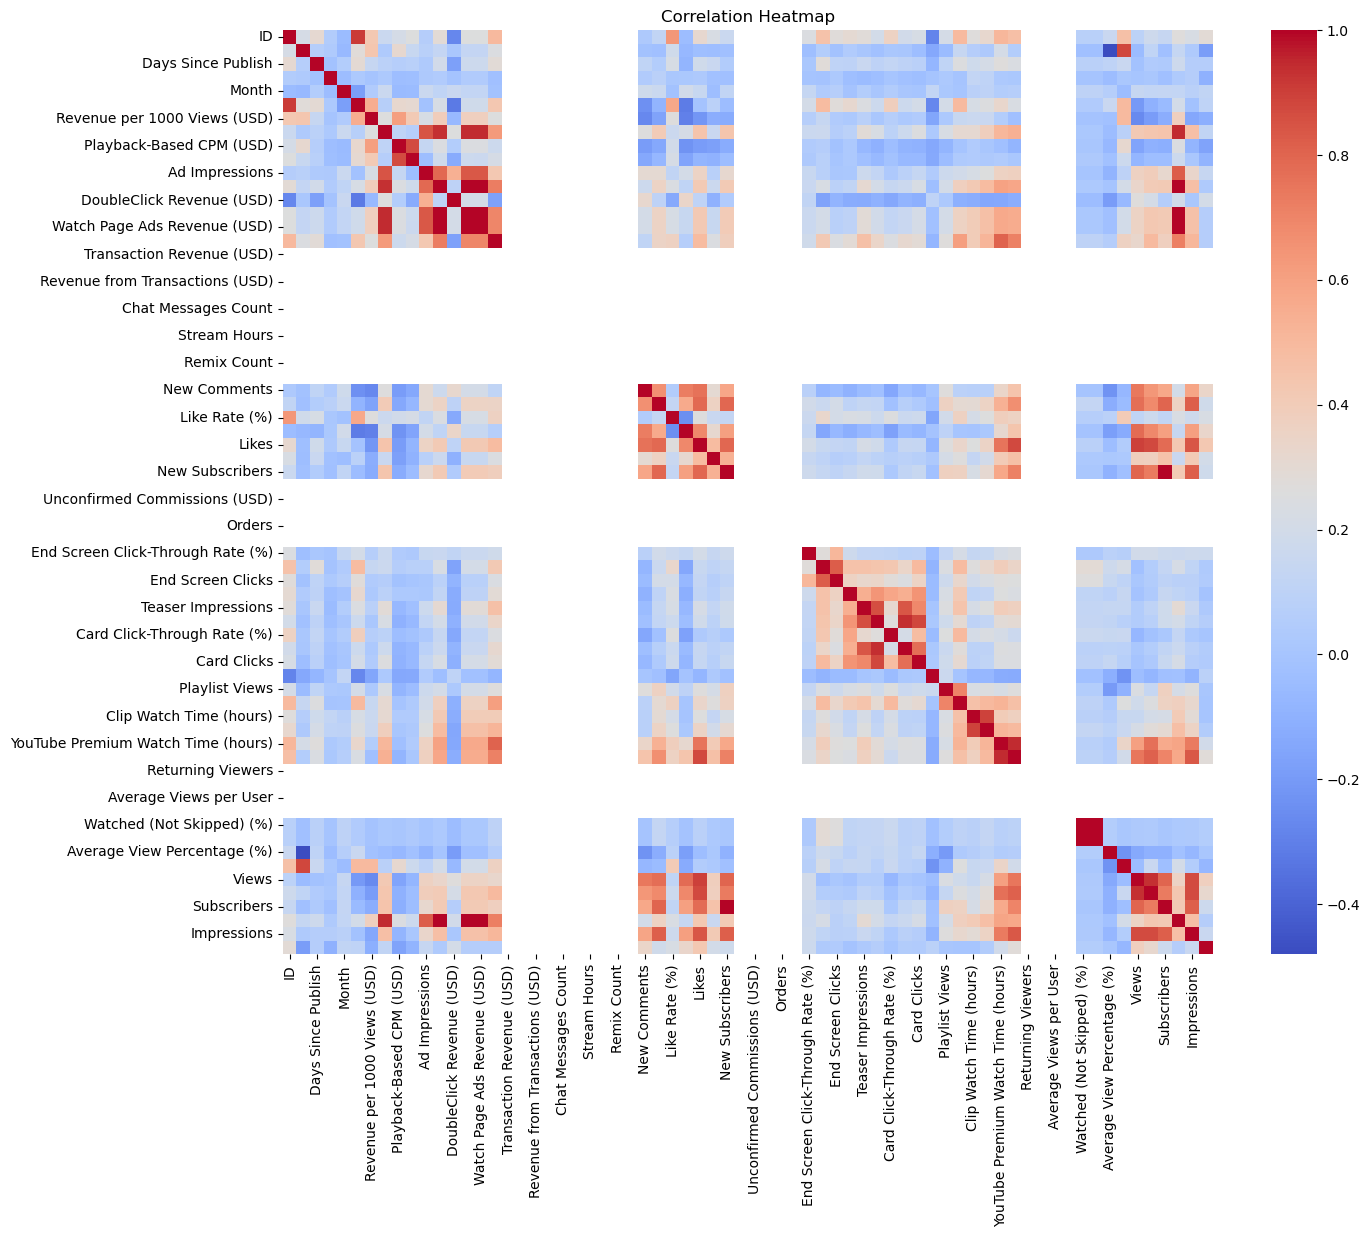

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


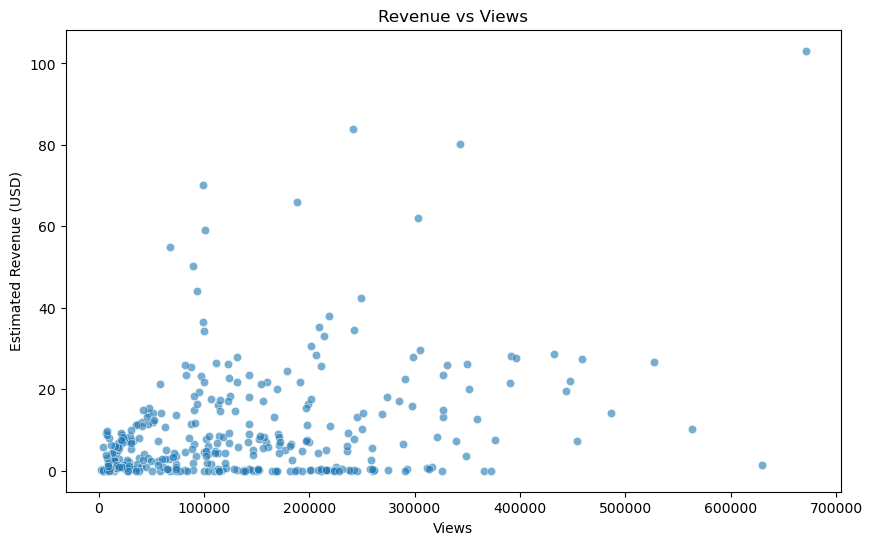

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Views', y='Estimated Revenue (USD)', alpha=0.6)
plt.title('Revenue vs Views')
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.show()


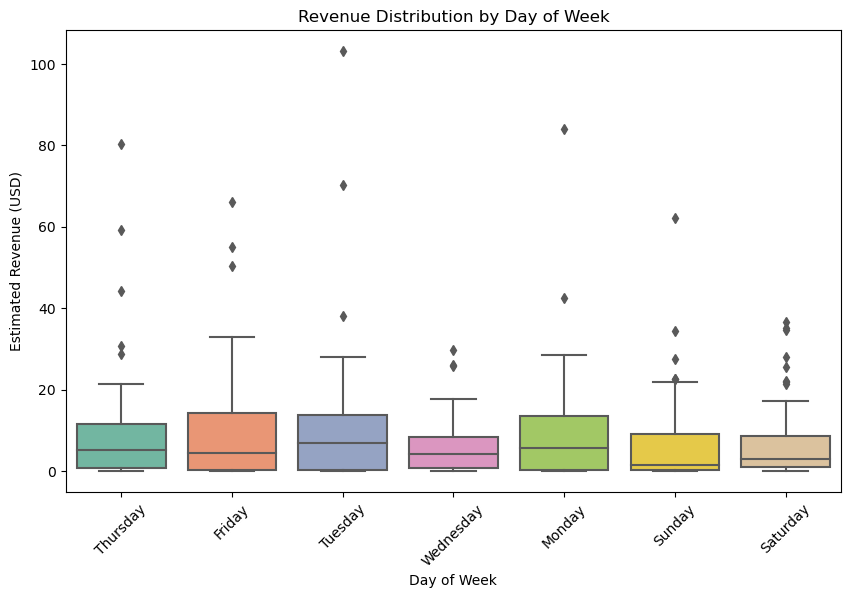

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of Week', y='Estimated Revenue (USD)', palette='Set2')
plt.title('Revenue Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Estimated Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


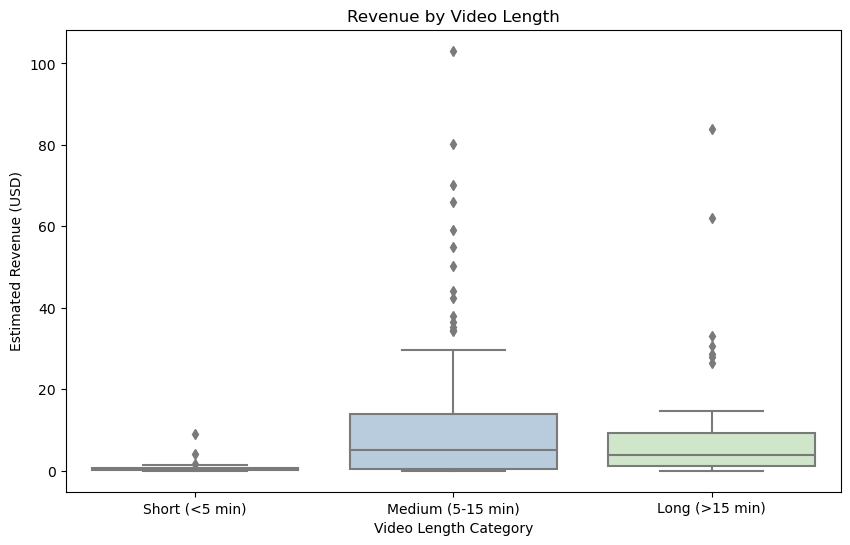

In [12]:
df['Video Length Category'] = pd.cut(df['Video Duration'],
                                     bins=[0, 300, 900, np.inf],
                                     labels=['Short (<5 min)', 'Medium (5-15 min)', 'Long (>15 min)'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Video Length Category', y='Estimated Revenue (USD)', palette='Pastel1')
plt.title('Revenue by Video Length')
plt.show()


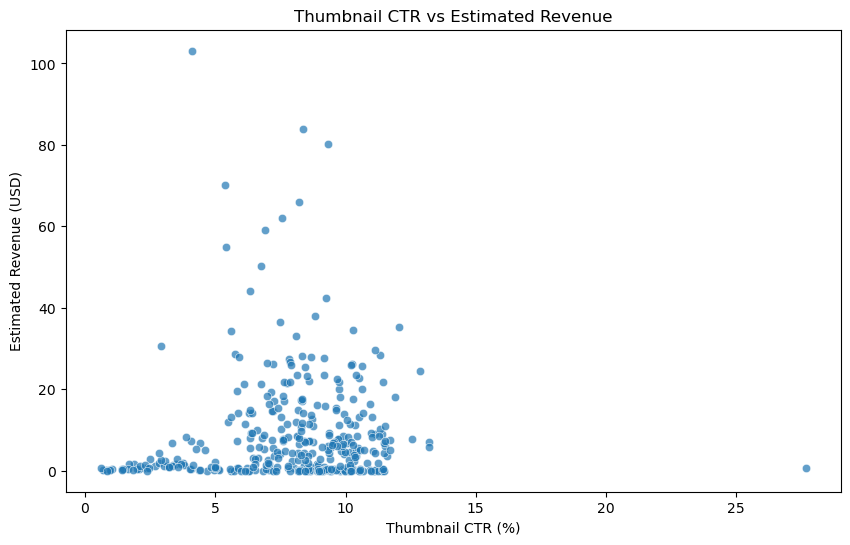

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Video Thumbnail CTR (%)', y='Estimated Revenue (USD)', alpha=0.7)
plt.title('Thumbnail CTR vs Estimated Revenue')
plt.xlabel('Thumbnail CTR (%)')
plt.ylabel('Estimated Revenue (USD)')
plt.show()


# Feature analysis

In [16]:
df = df[(df['Views'] != 0) & (df['Days Since Publish'] != 0)]

df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']
df['Engagement Rate (%)'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100
df['Views per Hour'] = df['Views'] / (df['Days Since Publish'] * 24)

In [17]:
features = [
    'Views',
    'Likes',
    'Shares',
    'New Comments',
    'Subscribers',
    'Ad Impressions',
    'Average View Duration',
    'Video Thumbnail CTR (%)',
    'Revenue per View',
    'Engagement Rate (%)',
    'Views per Hour'
]

X = df[features]
y = df['Estimated Revenue (USD)']

# Train the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Initialize the model
lgb_model = LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 985
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 11
[LightGBM] [Info] Start training from score 9.584567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(random_state=42)

In [20]:
y_pred = lgb_model.predict(X_test)

# Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Root Mean Squared Error (RMSE): 4.32
R-squared (R²): 0.88


# Detailed Ananlysis

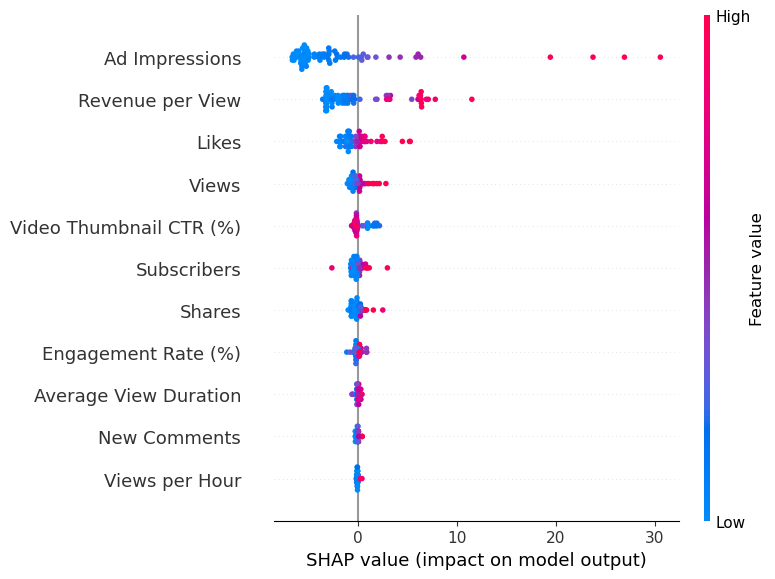

In [24]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


<Axes: xlabel='Video Length Category', ylabel='Revenue per Hour'>

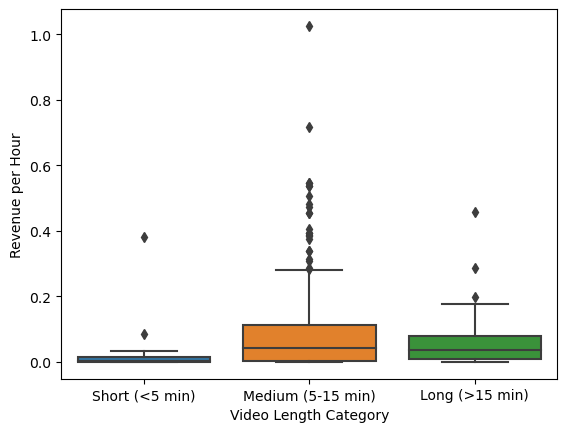

In [26]:
df['Revenue per Hour'] = df['Estimated Revenue (USD)'] / (df['Days Since Publish'] * 24)
sns.boxplot(x='Video Length Category', y='Revenue per Hour', data=df)


In [27]:
df['Revenue Efficiency'] = df['Revenue per View'] * df['Engagement Rate (%)'] * df['Video Thumbnail CTR (%)']
df.sort_values('Revenue Efficiency', ascending=False).head(10)


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Video Length Category,Revenue per View,Engagement Rate (%),Views per Hour,Revenue per Hour,Revenue Efficiency
363,363,1875.0,2024-10-18 00:00:00,23,18,10,2024,Friday,1.600,1791.0,...,-3.0,5.915,43431.0,6.67,Long (>15 min),0.001521,9.845758,7.047101,0.010716,0.099857
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,14.0,9.852,76517.0,8.28,Long (>15 min),0.001161,9.284789,23.575000,0.027367,0.089243
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,7.0,8.705,65912.0,9.36,Medium (5-15 min),0.001049,7.724753,49.392857,0.051815,0.075850
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,16.0,8.063,97065.0,8.23,Medium (5-15 min),0.000805,8.454781,41.741667,0.033596,0.056004
358,358,2311.0,2024-08-15 00:00:00,11,15,8,2024,Thursday,1.308,3023.0,...,7.0,9.333,80710.0,6.42,Long (>15 min),0.001307,6.538785,27.053030,0.035352,0.054857
294,294,748.0,2021-12-17 00:00:00,22,17,12,2021,Friday,0.815,35452.0,...,581.0,55.040,995623.0,5.40,Medium (5-15 min),0.000815,10.644502,127.946970,0.104242,0.046831
357,357,635.0,2024-08-04 00:00:00,12,4,8,2024,Sunday,0.548,3451.0,...,30.0,6.297,90831.0,9.47,Medium (5-15 min),0.000548,7.809507,39.881944,0.021865,0.040545
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,11.0,3.858,67091.0,8.29,Medium (5-15 min),0.000546,7.577904,32.685185,0.017861,0.034329
320,320,801.0,2023-11-07 00:00:00,260,7,11,2023,Tuesday,0.314,13637.0,...,357.0,25.936,851456.0,7.90,Medium (5-15 min),0.000314,13.315879,13.221635,0.004156,0.033070
290,290,517.0,2021-11-05 00:00:00,10,5,11,2021,Friday,0.564,47690.0,...,995.0,50.344,1031421.0,6.77,Medium (5-15 min),0.000564,8.022714,372.016667,0.209767,0.030626


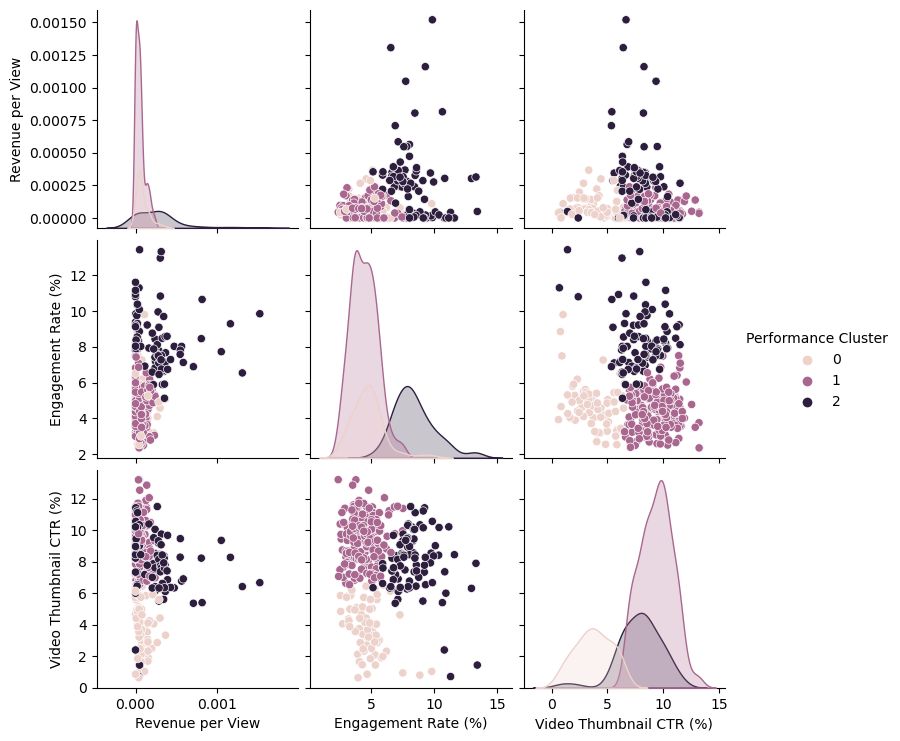

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = df[['Revenue per View', 'Engagement Rate (%)', 'Video Thumbnail CTR (%)']]

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Performance Cluster'] = kmeans.fit_predict(cluster_scaled)

sns.pairplot(df, hue='Performance Cluster', vars=cluster_data.columns)


<Axes: xlabel='Days Since Publish', ylabel='Estimated Revenue (USD)'>

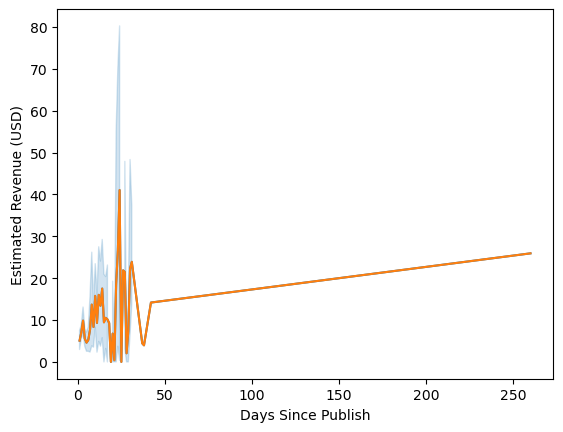

In [29]:
sns.lineplot(data=df, x='Days Since Publish', y='Estimated Revenue (USD)')
df.groupby('Days Since Publish')['Estimated Revenue (USD)'].mean().plot()
